In [260]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests


In [261]:

url="https://covid.ourworldindata.org/data/ecdc/full_data.csv"
s=requests.get(url).content
dataf=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [262]:

#dataf = pd.read_csv('/Users/ed/Documents/code/python/CoronaData/full_data_new.csv', sep = ',')
#data.head(10)
pd.set_option('display.max_row', 1000000)
#print(dataf)


#create new column of number of days since first death
#length of data
#print(dataf.shape[0])
currentTally = pd.DataFrame(columns=['Country', 'Cases', 'Deaths']) 

deathTime =0

unCountries = dataf.location.unique()

dataf['daysSinceFirstCase']= ''
dataf['daysSinceFirstDeath']= ''
dataf['maxCases']= ''
dataf['maxDeaths']= ''

#iterate through all countries except 'world'
for country in unCountries[:-1]:
    deathTime = 0;
    
    thisData = dataf[dataf.location == country]
    
    #print(thisData['location'].iloc[thisData.shape[0]-1])#
    #print(pd.isnull(thisData['total_deaths'].iloc[thisData.shape[0]-1]))#
    #print(thisData['total_deaths'].iloc[thisData.shape[0]-1])
    
    #get current cases and deaths
    currentCases = dataf.loc[thisData.shape[0]-1].total_cases
    
    if  (pd.isnull(thisData['total_deaths'].iloc[thisData.shape[0]-1])):
        
        currentDeaths = 0
        
    else:
        currentDeaths = thisData['total_deaths'].iloc[thisData.shape[0]-1]

    currentTally = currentTally.append(pd.Series([country, currentCases, currentDeaths], index=currentTally.columns ), ignore_index=True)
 

    #iterate days since first death
    for row in thisData.index:
        dataf.loc[row].daysSinceFirstCase = row
        dataf.iloc[row, dataf.columns.get_loc('maxCases')] = currentCases
        dataf.iloc[row, dataf.columns.get_loc('maxDeaths')] = currentDeaths

        if dataf.loc[row].total_deaths > 0:     
            #
            deathTime = deathTime + 1
            dataf.iloc[row, dataf.columns.get_loc('daysSinceFirstDeath')] = deathTime
            currentTotal = dataf.iloc[row].total_deaths
        else: 
            #
            dataf.iloc[row, dataf.columns.get_loc('daysSinceFirstDeath')] = 0

            
dataf = dataf.sort_values(by=['maxDeaths', 'daysSinceFirstCase'],ascending=False)
#    ['col1', 'col2']



currentTally= currentTally.sort_values('Deaths', ascending = False)
currentTally = currentTally.reset_index()
currentTally.Country = currentTally.Country
sorter = currentTally['Country'].to_list()

topTen = pd.DataFrame()

for i in range(1,11):
    thisData = dataf[dataf.location == sorter[i]]
    
    topTen = topTen.append(thisData) 

#print(topTen)
        
#sort current tally by most deaths
#print(sorter)




/Users/ed/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


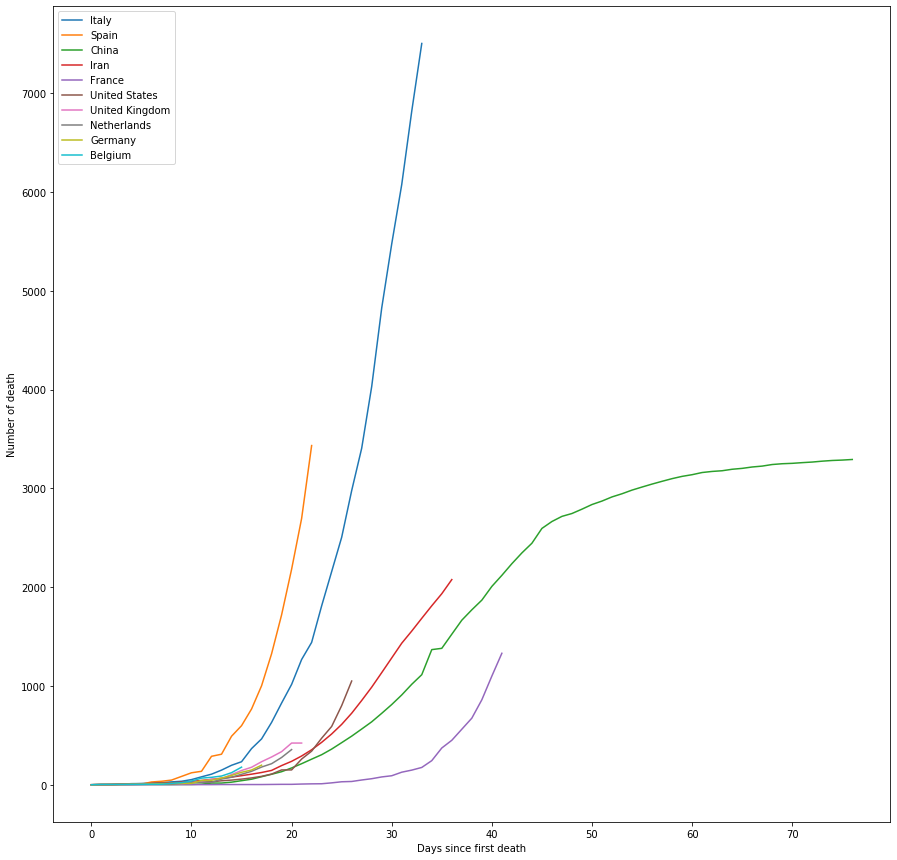

In [263]:
#dataf.plot(x ='daysSinceFirstDeath', y='total_deaths', kind = 'line')

fig,ax = plt.subplots()
fig.set_figheight(15)
fig.set_figwidth(15)

unCountries = topTen.location.unique()

for country in unCountries:
    ax.plot(topTen[topTen.location==country].daysSinceFirstDeath,topTen[topTen.location==country].total_deaths,label=country)

ax.set_xlabel("Days since first death")
ax.set_ylabel("Number of death")
handles, labels = ax.get_legend_handles_labels()

ax.legend(loc='upper left')